# Explore here

# **Búsqueda de una posible relación entre los recursos sanitarios y los datos socio demográficos.**

Importación de las librerías necesarias

In [2]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para el escalado de varibles, asegurando mismo rango (0 a 1):
from sklearn.preprocessing import MinMaxScaler

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para usar el método Z-score y detectar outlaiers:
from scipy.stats import zscore

# Librería para seleccionar características con SelectKBest:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# Librería para poder iniciar el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression

# Librería para calcular error cuadrático y el coeficiente de determinación (evaluación y comparación de modelos de regresión)
from sklearn.metrics import mean_squared_error, r2_score

## **Paso 1. Lectura de datos.**
Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv y se ha cargado en un Data Frame:

In [3]:
# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")


# Se muestran las 5 primeras filas del Data Frame
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Generalmente en esta parte se hace una descripción del valor de cada variable, pero viendo que se trata de 108, sería demasiado tedioso, asique filtraremos primeramente las más importantes para describirlas después.

## *Paso 2. Exploración y limpieza de datos.*

### *Paso 2.1 Comprensión de las características.*

In [4]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} beneficiarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 3140 beneficiarios, con un total de 108 datos característicos de cada uno de ellos.


### *Paso 2.2 Identificación de valores duplicados y nulos.* 

In [ ]:
# Descripción general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [16]:
# Identificar las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Convertir a lista y eliminar índice y dtype
categorical_columns = categorical_columns.tolist()
print(f"En este punto sabemos que de las 108 variables, solo 2 son categóricas {categorical_columns} mientras que las 106 restantes son numéricas")

En este punto sabemos que de las 108 variables, solo 2 son categóricas ['COUNTY_NAME', 'STATE_NAME'] mientras que las 106 restantes son numéricas


In [12]:
# Sumar valores nulos por columna
null_columns = data.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print(null_columns[null_columns > 0])


Series([], dtype: int64)


No aparecen valores nulos en el Dataframe


In [14]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


## *Paso 3. Análisis univariado*

### *Paso3.1 Análisis de variables categóricas.*

/tmp/ipykernel_943/1649206514.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], data=data[data['COUNTY_NAME'].isin(top_counties)], x="COUNTY_NAME", order=top_counties, palette="viridis")
/tmp/ipykernel_943/1649206514.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], data=data, x="STATE_NAME", order=state_order, palette="coolwarm")


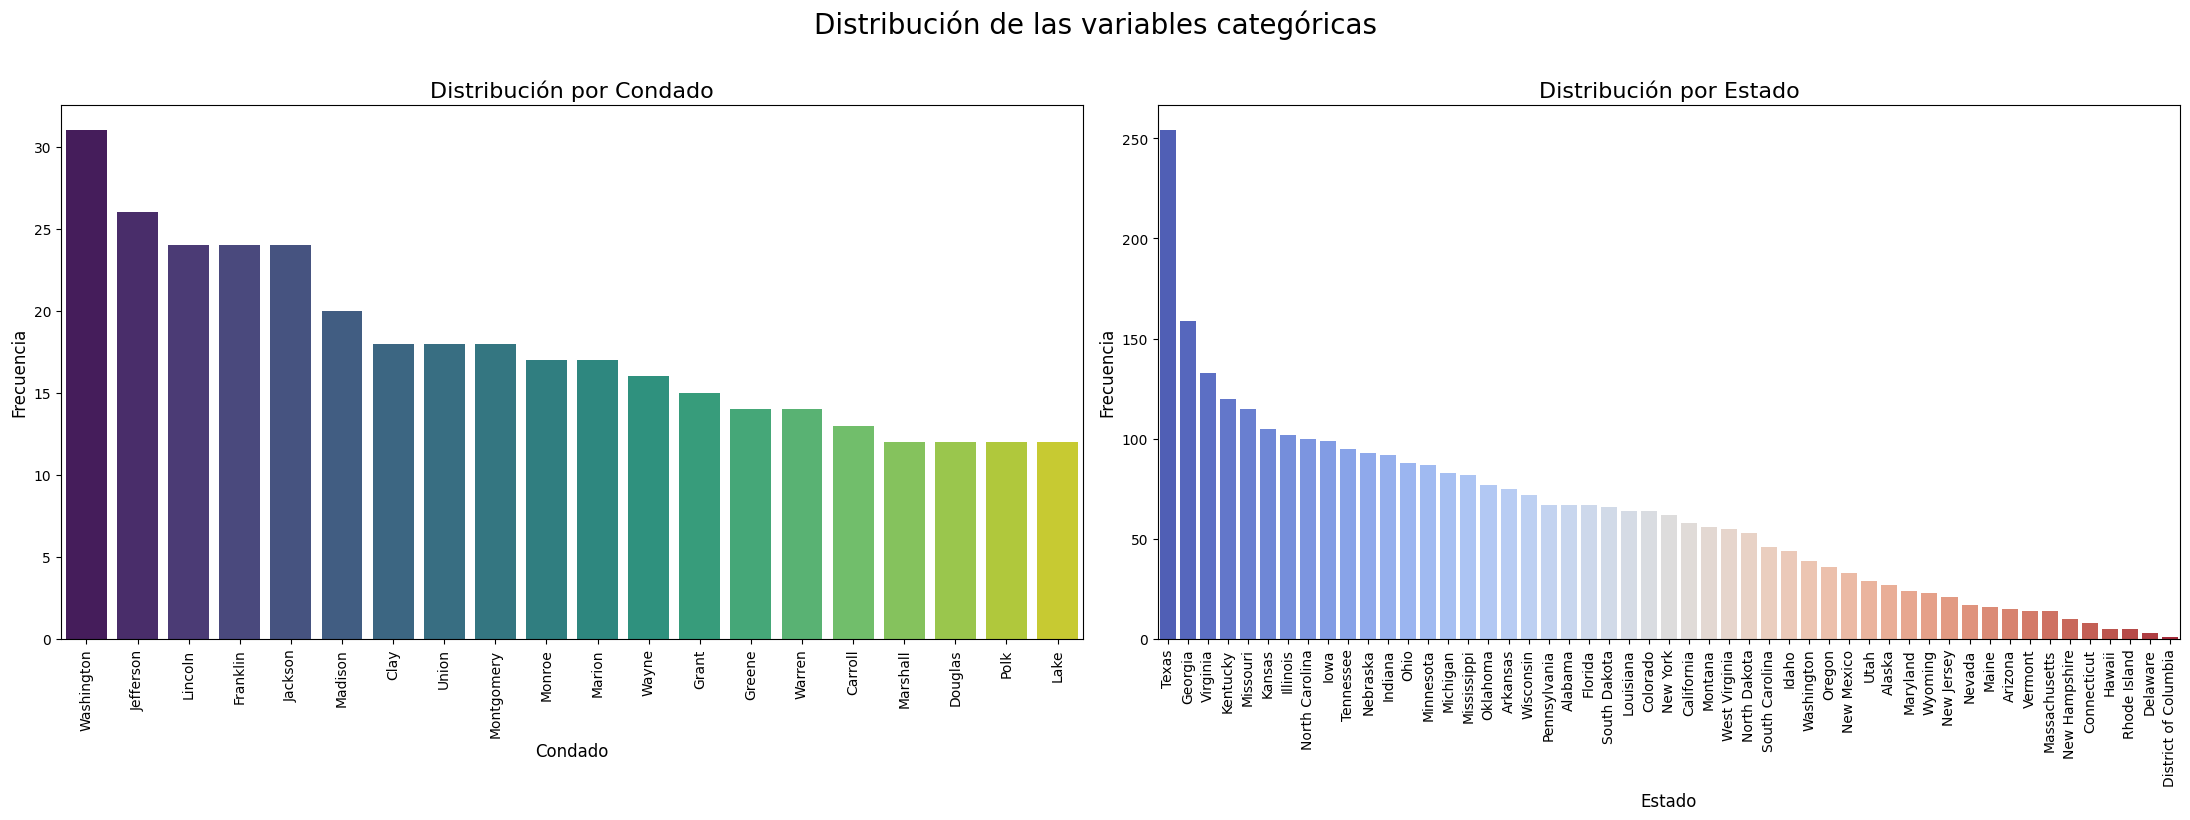

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(22, 8))

# Añadir un título global
fig.suptitle("Distribución de las variables categóricas", fontsize=20, y=1.02)

# Gráfico de COUNTY_NAME (Mostrando solo los 20 más comunes para evitar sobrecarga visual)
top_counties = data['COUNTY_NAME'].value_counts().nlargest(20).index
sns.countplot(ax=axis[0], data=data[data['COUNTY_NAME'].isin(top_counties)], x="COUNTY_NAME", order=top_counties, palette="viridis")
axis[0].set_title("Distribución por Condado", fontsize=16)
axis[0].set_xlabel("Condado", fontsize=12)
axis[0].set_ylabel("Frecuencia", fontsize=12)
axis[0].tick_params(axis='x', rotation=90)

# Gráfico de STATE_NAME (Ordenado por frecuencia)
state_order = data['STATE_NAME'].value_counts().index
sns.countplot(ax=axis[1], data=data, x="STATE_NAME", order=state_order, palette="coolwarm")
axis[1].set_title("Distribución por Estado", fontsize=16)
axis[1].set_xlabel("Estado", fontsize=12)
axis[1].set_ylabel("Frecuencia", fontsize=12)
axis[1].tick_params(axis='x', rotation=90)

# Ajustar márgenes y espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Espacio para el título global

# Mostrar la gráfica
plt.show()


### *Paso 3.2 Análisis de variables numéricas*